In [1]:
from imblearn.over_sampling import SMOTE, ADASYN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fastai.tabular.all import df_shrink
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.validation import check_is_fitted
from sklearn.pipeline import make_pipeline
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Capstone/TON_IOT_pre.unknown")

In [4]:

print(df.shape)
df.head()

(1210789, 20)


,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack,IPV4_SRC_ADDR_0,IPV4_SRC_ADDR_1,IPV4_SRC_ADDR_2,IPV4_SRC_ADDR_3,IPV4_DST_ADDR_0,IPV4_DST_ADDR_1,IPV4_DST_ADDR_2,IPV4_DST_ADDR_3
0,63318,443,6,91.00,181,165,2,1,24,327,0,Benign,192,168,1,195,52,139,250,253
1,57442,15600,17,0.00,63,0,1,0,0,0,0,Benign,192,168,1,79,192,168,1,255
2,57452,15600,17,0.00,63,0,1,0,0,0,0,Benign,192,168,1,79,239,255,255,250
3,51989,15600,17,0.00,63,0,1,0,0,0,0,Benign,192,168,1,79,192,168,1,255
4,53927,1900,17,153.12,459,0,3,0,0,614,0,Benign,192,168,1,6,239,255,255,250


In [5]:
df = df_shrink(df, obj2cat=False, int2uint=False)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210789 entries, 0 to 1210788
Data columns (total 20 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   L4_SRC_PORT                 1210789 non-null  int32  
 1   L4_DST_PORT                 1210789 non-null  int32  
 2   PROTOCOL                    1210789 non-null  int8   
 3   L7_PROTO                    1210789 non-null  float32
 4   IN_BYTES                    1210789 non-null  int32  
 5   OUT_BYTES                   1210789 non-null  int32  
 6   IN_PKTS                     1210789 non-null  int32  
 7   OUT_PKTS                    1210789 non-null  int32  
 8   TCP_FLAGS                   1210789 non-null  int16  
 9   FLOW_DURATION_MILLISECONDS  1210789 non-null  int32  
 10  Label                       1210789 non-null  int8   
 11  Attack                      1210789 non-null  object 
 12  IPV4_SRC_ADDR_0             1210789 non-null  int16  
 1

In [9]:
X = df.drop(columns='Attack')
y = df['Attack'].astype('category')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [12]:
rf_model = pickle.load(open("/content/drive/MyDrive/Colab Notebooks/Capstone/rf_binary_adasyn.pkl", "rb"))

In [21]:
importances = rf_model.named_steps['randomforestclassifier'].feature_importances_

In [23]:
columns = rf_model.named_steps['standardscaler'].get_feature_names_out()

In [29]:
important = pd.DataFrame(importances, index=columns)

In [32]:
important.columns = ['importance']

In [33]:
important.index.name = 'name'

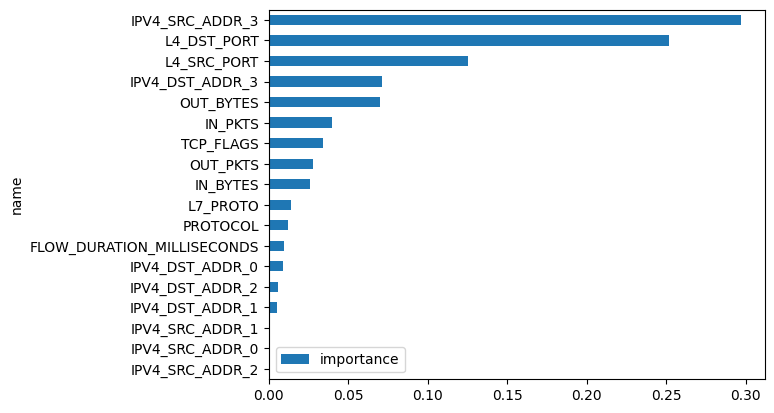

In [43]:
important.sort_values(by='importance',ascending=True).plot(kind='barh');

In [45]:
xg_model = pickle.load(open("/content/drive/MyDrive/Colab Notebooks/Capstone/xg_binary_adasyn.pkl", "rb"))

In [46]:
xg_importances = xg_model.named_steps['gradientboostingclassifier'].feature_importances_

In [47]:
xg_cols = xg_model.named_steps['standardscaler'].get_feature_names_out()

In [48]:
xg_df = pd.DataFrame(xg_importances,index=xg_cols)

In [49]:
xg_df.columns = ['importance']

In [50]:
xg_df.index_name = 'name'

In [58]:
xg_df = round(xg_df,5)

<Axes: >

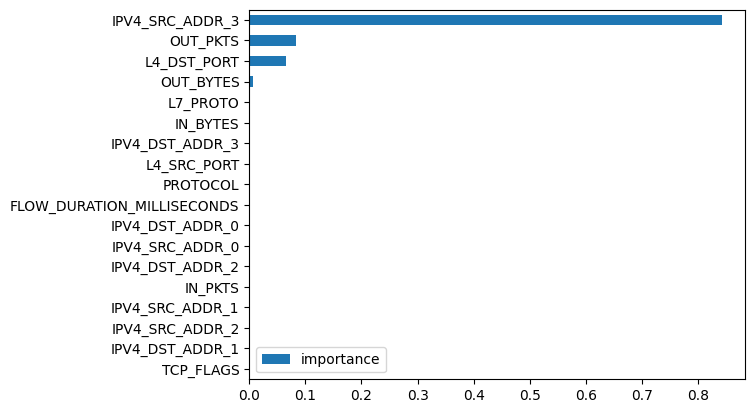

In [60]:
xg_df.sort_values(by='importance',ascending=True).plot(kind='barh')

In [61]:
test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone/TON_IOT_pre.unknown")

In [62]:
df.head()

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack,IPV4_SRC_ADDR_0,IPV4_SRC_ADDR_1,IPV4_SRC_ADDR_2,IPV4_SRC_ADDR_3,IPV4_DST_ADDR_0,IPV4_DST_ADDR_1,IPV4_DST_ADDR_2,IPV4_DST_ADDR_3
0,63318,443,6,91.000000,181,165,2,1,24,327,0,Benign,192,168,1,195,52,139,250,253
1,57442,15600,17,0.000000,63,0,1,0,0,0,0,Benign,192,168,1,79,192,168,1,255
2,57452,15600,17,0.000000,63,0,1,0,0,0,0,Benign,192,168,1,79,239,255,255,250
3,51989,15600,17,0.000000,63,0,1,0,0,0,0,Benign,192,168,1,79,192,168,1,255
4,53927,1900,17,153.119995,459,0,3,0,0,614,0,Benign,192,168,1,6,239,255,255,250


In [66]:
new_test = df.drop(['Label','Attack'],axis=1)
new_target = df['Label']

In [67]:
pred = rf_model.predict(new_test)

In [68]:
print(classification_report(pred, new_target))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    212779
           1       1.00      1.00      1.00    998010

    accuracy                           1.00   1210789
   macro avg       1.00      1.00      1.00   1210789
weighted avg       1.00      1.00      1.00   1210789



In [69]:
pred1 = xg_model.predict(new_test)

In [70]:
print(classification_report(pred1, new_target))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    212677
           1       1.00      1.00      1.00    998112

    accuracy                           1.00   1210789
   macro avg       1.00      1.00      1.00   1210789
weighted avg       1.00      1.00      1.00   1210789



In [71]:
log_model = pickle.load(open("/content/drive/MyDrive/Colab Notebooks/Capstone/log_bianry_adasyn.pkl","rb"))

In [73]:
importances =  log_model.coef_[0]

In [79]:
ocols=  log_model.feature_names_in_

In [80]:
lof_df = pd.DataFrame(importances, index=ocols)

In [81]:
lof_df.columns= ['importance']

In [82]:
lof_df.index.name = 'name'

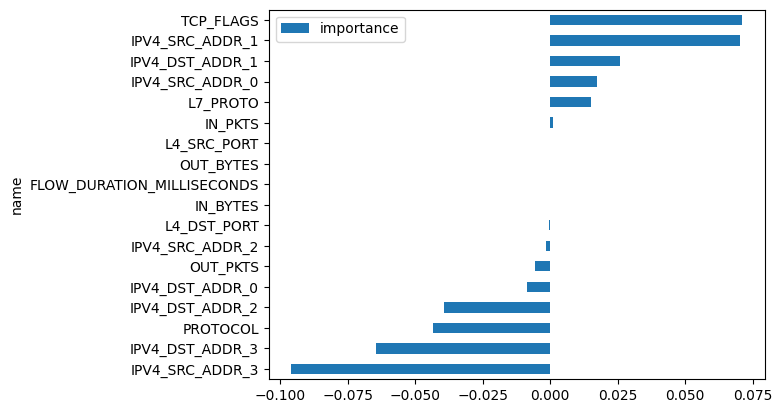

In [85]:
lof_df.sort_values(by='importance', ascending=True).plot(kind='barh');